<a href="https://colab.research.google.com/github/MahaswetaTalik/DEEP_LEARNING/blob/main/Data_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
df = df.iloc[:,2:]
df.head()

,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: xlabel='mean perimeter', ylabel='mean area'>

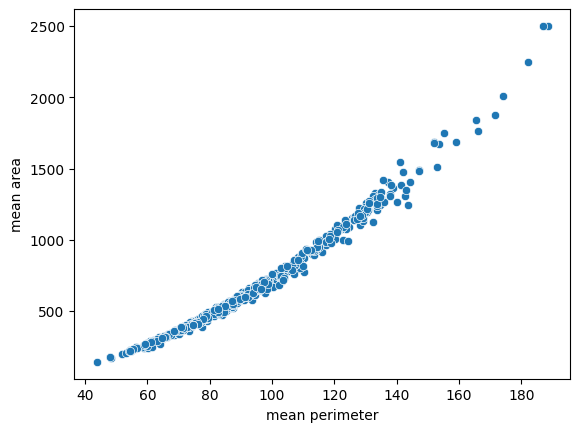

In [6]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4129 - loss: 6.3014 - val_accuracy: 0.3947 - val_loss: 0.6707
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5218 - loss: 1.5490 - val_accuracy: 0.6053 - val_loss: 1.7094
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6184 - loss: 1.0390 - val_accuracy: 0.8158 - val_loss: 0.4743
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8406 - loss: 0.3860 - val_accuracy: 0.8421 - val_loss: 0.3640
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8827 - loss: 0.2978 - val_accuracy: 0.8421 - val_loss: 0.3623
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.3390 - val_accuracy: 0.8070 - val_loss: 0.4097
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8687 - loss: 0.3349 - val_accuracy: 0.8333 - val_loss: 0.3757
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8567 - loss: 0.3026 - val_accuracy: 0.8246 - 

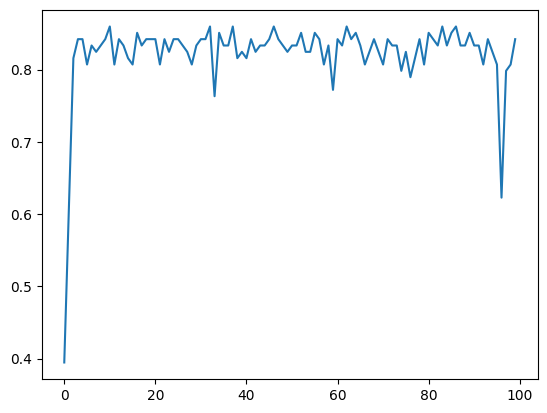

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])

**Apply Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-1.49196246e-02, -1.44788945e-01],
       [-8.77027456e-01, -7.65610311e-01],
       [ 1.47428816e+00,  1.40542437e+00],
       [-7.49832333e-03, -1.52149345e-01],
       [-8.18069340e-01, -7.93919539e-01],
       [-9.26090503e-01, -8.63843332e-01],
       [-3.72378969e-01, -3.42387356e-01],
       [ 3.39970355e+00,  3.84567981e+00],
       [ 1.66077668e-01,  1.00357768e-03],
       [-1.79837431e-01, -2.15845107e-01],
       [ 1.87421384e+00,  2.13014060e+00],
       [ 1.67631248e+00,  1.33465130e+00],
       [-5.90482768e-01, -5.26963521e-01],
       [ 1.89895152e+00,  1.85837201e+00],
       [-3.80624860e-01, -4.46565314e-01],
       [-8.45280778e-01, -7.55702081e-01],
       [-1.52213698e-01, -1.94896279e-01],
       [ 7.23912147e-01,  6.64571877e-01],
       [-5.82649172e-01, -5.95188760e-01],
       [ 3.04100732e+00,  3.36725386e+00],
       [ 2.05657941e-01,  2.05369449e-02],
       [-8.04744525e-02, -1.36296177e-01],
       [-1.08977143e+00, -9.24708171e-01],
       [-8.

<Axes: >

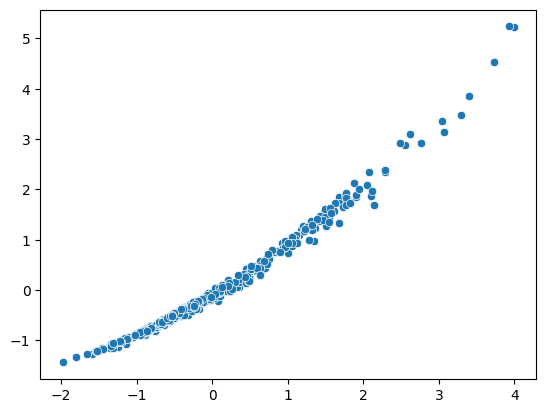

In [19]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [20]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8709 - loss: 0.6455 - val_accuracy: 0.8333 - val_loss: 0.5547
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9030 - loss: 0.5259 - val_accuracy: 0.8333 - val_loss: 0.4704
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8663 - loss: 0.4602 - val_accuracy: 0.8333 - val_loss: 0.4140
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8869 - loss: 0.3966 - val_accuracy: 0.8509 - val_loss: 0.3744
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8900 - loss: 0.3474 - val_accuracy: 0.8509 - val_loss: 0.3485
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8697 - loss: 0.3272 - val_accuracy: 0.8509 - val_loss: 0.3325
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8848 - loss: 0.3129 - val_accuracy: 0.8596 - val_loss: 0.3230
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8689 - loss: 0.3058 - val_accuracy: 0.8

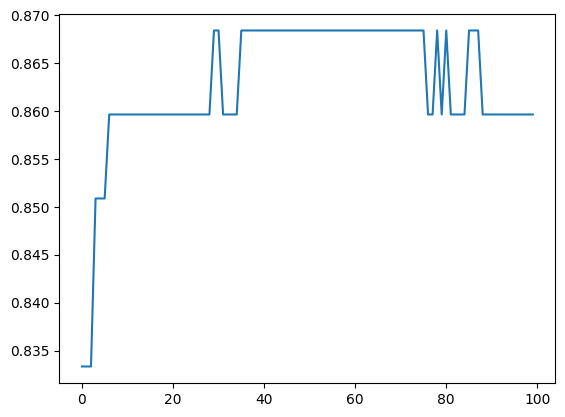

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])